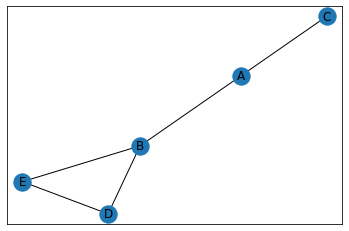

In [1]:
# Project name: Social Network Analysis
# Author: Daniyal Khan
# Date: Tue 11/03/2020 
# Time: 22:50:25.05

# In this project I will try to solve some of the question in the interconnected
# Facebook Frinedship Networks.

# We will be using NetworkX for creating graphs. NetworkX is Pyhton toolbox for 
# the creation, manipulation and study of the structure, dynamics and functiosn
# of complex networks.
import networkx as nx

# Basic use of NetwrokX
# I'm creating a graph as follows:

#    C       E
#    |      / \
#    A ___ B___D
  
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('B', 'E')
G.add_edge('B', 'D')
G.add_edge('D', 'E')
nx.draw_networkx(G)

In [20]:
# Project name: Social Network Analysis
# Author: Daniyal Khan
# Date: Tue 11/03/2020 
# Time: 22:50:25.05

# In this project I will try to solve some of the question in the interconnected
# Facebook Frinedship Networks.

# We will be using NetworkX for creating graphs. NetworkX is Pyhton toolbox for 
# the creation, manipulation and study of the structure, dynamics and functiosn
# of complex networks.
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os.path
# Basic use of NetwrokX
# I'm creating a graph as follows:

#    C       E
#    |      / \
#    A ___ B___D
  
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('B', 'E')
G.add_edge('B', 'D')
G.add_edge('D', 'E')

# Here the graph is printed
nx.draw_networkx(G)

ModuleNotFoundError: ignored

Nodes:  4039
Edges:  88234
Average Degree:  21


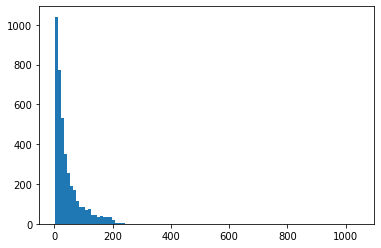

In [3]:
# Note: for creating directed graph nx.DiGraph is used

# For this project I've cited dataset from e Stanford Large Network Dataset (SNAP)
# This dataset consists of a network representating friendship between Facebook users.
# The Facebook data has been anonymized by replacing the internal Facebook identifiers
# for each user with a new value

# let us load and extract some basic information from the graph./
fb = nx.read_adjlist("/content/drive/My Drive/Machine Learning/facebook_combined.txt")
fb_n, fb_k = fb.order(), fb.size()
fb_avg_deg = fb_k / fb_n
print('Nodes: ', fb_n)
print('Edges: ', fb_k)
print('Average Degree: ', int(fb_avg_deg))
degrees = [v for k, v in fb.degree() ]
degree_hist = plt.hist(degrees, 100)

Facebook degree centrality:  [('107', 0.258791480931154), ('1684', 0.1961367013372957), ('1912', 0.18697374938088163), ('3437', 0.13546310054482416), ('0', 0.08593363051015354), ('2543', 0.07280832095096582), ('2347', 0.07206537890044576), ('1888', 0.0629024269440317), ('1800', 0.06067360079247152), ('1663', 0.058197127290737984)]


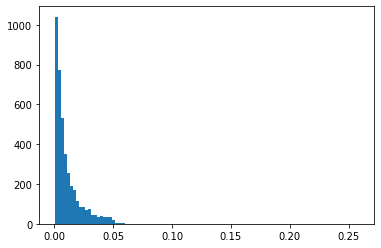

In [4]:
# Degree Centrality
degree_cent_fb = nx.degree_centrality(fb)
print('Facebook degree centrality: ', sorted( degree_cent_fb.items(), 
                                    key= lambda x: x[1],
                                    reverse= True)[:10])
degree_hist = plt.hist(list(degree_cent_fb.values()), 100)

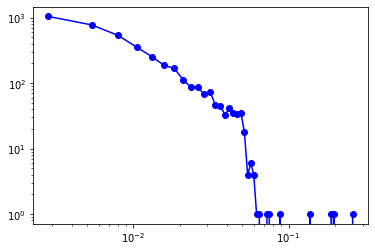

In [5]:
plt.loglog(degree_hist[1][1:], degree_hist[0], 'b', marker= 'o')

In [ ]:
# Betweenness, Closeness and Eigenvector Centrality
betweenness_fb = nx.betweenness_centrality(fb)
closeness_fb = nx.closeness_centrality(fb)
eigenvector_fb = nx.eigenvector_centrality(fb)
print('Betweenness Centrality: ', sorted(betweenness_fb.items(),
                                    key= lambda x: x[1],
                                    reverse=True)[:10])
print('Closeness Centrality: ', sorted(closeness_fb.items(),
                                    key= lambda x: x[1],
                                    reverse=True)[:10])
print('Eigenvector Centrality: ', sorted(eigenvector_fb.items(),
                                    key= lambda x: x[1],
                                    reverse=True)[:10])

Betweenness Centrality:  [('107', 0.4805180785560152), ('1684', 0.3377974497301992), ('3437', 0.23611535735892905), ('1912', 0.2292953395868782), ('1085', 0.14901509211665306), ('0', 0.14630592147442917), ('698', 0.11533045020560802), ('567', 0.09631033121856215), ('58', 0.08436020590796486), ('428', 0.06430906239323866)]
Closeness Centrality:  [('107', 0.45969945355191255), ('58', 0.3974018305284913), ('428', 0.3948371956585509), ('563', 0.3939127889961955), ('1684', 0.39360561458231796), ('171', 0.37049270575282134), ('348', 0.36991572004397216), ('483', 0.3698479575013739), ('414', 0.3695433330282786), ('376', 0.36655773420479304)]
Eigenvector Centrality:  [('1912', 0.09540696149067629), ('2266', 0.08698327767886553), ('2206', 0.08605239270584343), ('2233', 0.08517340912756598), ('2464', 0.08427877475676092), ('2142', 0.08419311897991796), ('2218', 0.08415573568055032), ('2078', 0.08413617041724979), ('2123', 0.08367141238206226), ('1993', 0.0835324284081597)]


In [6]:
# If I only consider the graph nodes with more than the average degree of
# the network, I will do it by trimming the graph using degree centrality 
# value.
# I will define a function to trim the graph based of degree centrality value
# I will set the threshold to 21 connections.

def trim_by_degree_centrality(graph, degree = 0.01):
    gr = graph.copy()
    d = nx.degree_centrality(gr)
    # I have converted dict to list because dict elements can not be removed 
    # in an iterator.
    for n in list(gr.nodes()):
        if d[n] <= degree:
            gr.remove_node(n)
    return gr

In [7]:
degree_centrality_threshold = 21.0/(fb.order()-1.0)
print('Degree Centrality Threshold: ', degree_centrality_threshold)
fb_trimmed = trim_by_degree_centrality(fb, degree=degree_centrality_threshold)
print('Remaing Number of Nodes: ', len(fb_trimmed))

Degree Centrality Threshold:  0.005200594353640416
Remaing Number of Nodes:  2226


In [ ]:
# I've reduced the graph from 4,039 to 2,226
# now I will compute the current flow betweenness cetrality in the trimmed graph.
# trimmed graph is not connected but current flow betwenness cemtrality needs connected graph.
# Hene I will find the connected subgraphs in the trimmed graph.
fb_subgraph = list(nx.connected_component_subgraphs(fb_trimmed))
print("Number of Subgraphs Found: ", len(fb_subgraph))
print("Number of Nodes in the 0th Subgraph: ", len(fb_subgraph[0]))
betweenness = nx.betweenness_centrality(fb_subgraph[0])
print("Trimmed FB Betweenness: ", sorted(betweenness.items(), 
                                key=lambda x: x[1],
                                reverse=True)[:10])
current_flow = nx.current_flow_betweenness_centrality(fb_subgraph[0])
print('Trimmed FB Subgraph Current Flow Betweenness Cetrality: ', sorted(current_flow.items(),
                                                                key= lambda x: x[1],
                                                                reverse=True)[:10])

AttributeError: ignored

Now I will visulaize the centralities on Graphs for understanding and using the analysis.
There are several way to visulaize the network:
1.   random_layout
2.   spring_layput etc

I using the spring layout for better understandability

In [31]:
pos_fb = nx.spring_layout(fb, iterations=1000, k=0.5)

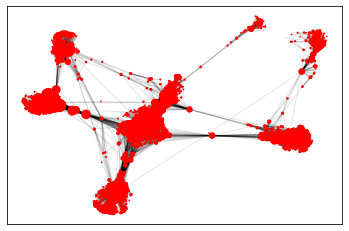

In [ ]:
# Now I will visulaize the centralities on Graphs for understanding and using the analysis
# there are several ways to visulaize the network:
# random_layout
# spring_layout etc
# I using the spring layout for better understandability

nsize=  np.array([ v for v in degree_cent_fb.values() ])
nsize = 500 * (nsize - min(nsize))/(max(nsize) - min(nsize))
nodes = nx.draw_networkx_nodes(fb, pos=pos_fb,node_color='r',
                                node_size=nsize)
edges = nx.draw_networkx_edges(fb, pos=pos_fb, alpha=.1)

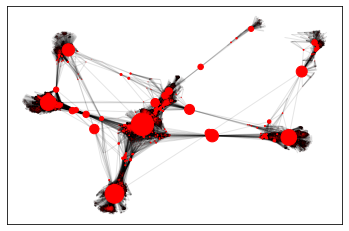

In [ ]:
# Changing the centrality measure to closeness centrality and eigenvector centrality, I found
# different spring_layout graph but mostly similar. 
nsize=  np.array([ v for v in betweenness_fb.values() ])
nsize = 500*(nsize - min(nsize))/(max(nsize) - min(nsize))
nodes = nx.draw_networkx_nodes(fb, pos=pos_fb, node_color='r',
                                node_size=nsize)
edges = nx.draw_networkx_edges(fb, pos=pos_fb, alpha=.1)

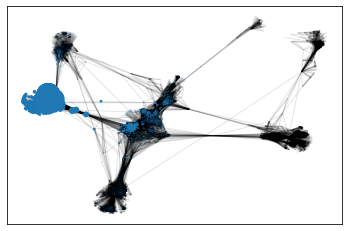

In [ ]:
# Changing the centrality measure to closeness centrality and eigenvector centrality, I found
# different spring_layout graph but mostly similar. 
nsize=  np.array([ v for v in eigenvector_fb.values() ])
nsize = 500*(nsize - min(nsize))/(max(nsize) - min(nsize))
nodes = nx.draw_networkx_nodes(fb, pos=pos_fb,
                                node_size=nsize)
edges = nx.draw_networkx_edges(fb, pos=pos_fb, alpha=.1)

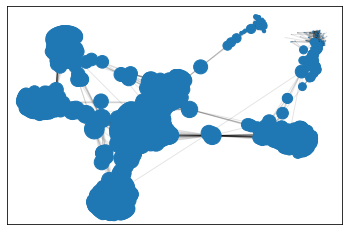

In [ ]:
# Changing the centrality measure to closeness centrality and eigenvector centrality, I found
# different spring_layout graph but mostly similar. 
nsize=  np.array([ v for v in closeness_fb.values() ])
nsize = 500*(nsize - min(nsize))/(max(nsize) - min(nsize))
nodes = nx.draw_networkx_nodes(fb, pos=pos_fb,
                                node_size=nsize)
edges = nx.draw_networkx_edges(fb, pos=pos_fb, alpha=.1)

# **Page Rank**
PageRank is an Algorithm invented by Larry Page and Sergey Brin, and bacame a Google trademark in 1998.
PageRank Algorithm is used to rate pages objectively and effectively.
If we consider a node as a webpage then then hyperlink to the page counts as a vote of support and a page has high rank. If the sum of the ranks of its incoming edges is high then the PageRank is high.

The PageRank algorithm is described froma probabilistic point of view. 
If we consider that one node has n edges to n nodes then we can say that the probabiltiy of going to anyone of the page is 1/n (initially).
Then we calculate the probablity again using the following formula:

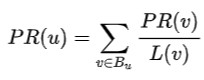

After few iteration, the page having higher probablity value get higher rank.

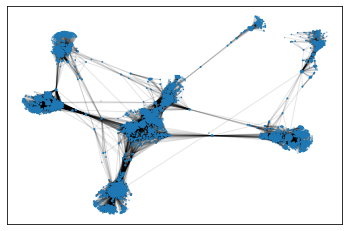

In [ ]:
pr = nx.pagerank(fb, alpha = 0.85)
nsize = np.array([ v for v in pr.values() ])
nsize = 50*(nsize - min(nsize)) / (max(nsize) - min(nsize))
nodes = nx.draw_networkx_nodes(fb,
                               pos = pos_fb,
                               node_size = nsize)
edges = nx.draw_networkx_edges(fb,
                               pos = pos_fb,
                               alpha = 0.1)


# Ego Networks
Ego networks are subnetworks of neighbors that are centered on a certain node. In Facebook and Linkedin these are described as "your network". Every node in a network has its own ego network and can only access the ndeos in it. All ego-networks interlock to form the whole social network.
Above I saw that the node is 107 is the most central node of the network for three centrality measures out of the four.
Therefore, I will use the well known node 107 to extract its ego-network.  


In [8]:
ego_107 = nx.ego_graph(fb, '107')
print('Number of nodes in ego graph 107: ', len(ego_107))
print('Number of nodes in ego graph having radious up to 2: ', 
      len(nx.ego_graph(fb, '107', radius=2 )))

Number of nodes in ego graph 107:  1046
Number of nodes in ego graph having radious up to 2:  2687


The ego network of node 107 has 1,046 nodes while when I expand its radius upto 2 then it can reach more nodes (2,687), which is a quite lasrge network having half of the nodes of whole network. 

The dataset we are using in this notebook provides the previously labeled ego-networks, I will compute the actual size of the ego-network following the user labeling.

In [9]:
ego_id = 107
net_107 = nx.read_edgelist(
    os.path.join('/content/drive/My Drive/Machine Learning/facebook', '{0}.edges'.format(ego_id)),
    nodetype = int
)

In [10]:
print('Nodes of the ego graph 107: ', len(net_107))

Nodes of the ego graph 107:  1034


I will try to understand the structure of the Facebook Network by comparing the 10 different ego-networks among them.
I will compute the number of edges in every ego network then will compare and choose the most dense ego network.

In [13]:
from numpy import zeros
ego_ids = (0, 107, 348, 414, 686, 698, 1684, 3980, 1912, 3437)
ego_sizes = zeros((10,1))
i = 0

for id in ego_ids:
  grp = nx.read_edgelist(
      os.path.join('/content/drive/My Drive/Machine Learning/facebook', '{0}.edges'.format(id)),
      nodetype = int
  )
  ego_sizes[i] = grp.size()
  i=i+1
[i_max, j] = (ego_sizes == ego_sizes.max()).nonzero()
ego_max = np.array(ego_ids)[i_max]
print('The most dense ego network is: ', ego_max[0])
G = nx.read_edgelist(
    os.path.join('/content/drive/My Drive/Machine Learning/facebook', '{0}.edges'.format(ego_max[0])),
    nodetype = int
)

print('Nodes: ', G.order())
print('Edges: ', G.size())
print('Average Degree: ', int(G.size()/G.order()))

The most dense ego network is:  1912
Nodes:  747
Edges:  30025
Average Degree:  40


Now I will compute that how many intesections exists between the ego-network in the Facebook Network. To do this, I will add a field ego_net for every node and store an array with ego-networks the node belongs to. Then having length of these arrays, I will be able to compute the number of nodes that belongs to 1, 2, 3, 4 amd more than 4 ego-networks.

In [27]:
for i in fb.nodes() :
  fb.nodes[str(i)]['egonet'] = []

for id in ego_ids:
  G = nx.read_edgelist(
      os.path.join('/content/drive/My Drive/Machine Learning/facebook', 
                   '{0}.edges'.format(id)),
                   nodetype = int
  )
  print(id)
  for n in G.nodes() :
    if (fb.nodes[str(n)]['egonet'] == []) :
      fb.nodes[str(n)]['egonet'] = [id]
    else :
      fb.nodes[str(n)]['egonet'].append(id)

# Computing the intersections
intersects = [len(x['egonet']) for x in fb.nodes.values() ]
print('Number of node into 0 ego-network:', sum(np.equal(intersects, 0)))
print('Number of node into 1 ego-network:', sum(np.equal(intersects, 1)))
print('Number of node into 2 ego-network:', sum(np.equal(intersects, 2)))
print('Number of node into 3 ego-network:', sum(np.equal(intersects, 3)))
print('Number of node into 4 ego-network:', sum(np.equal(intersects, 4)))
print('Number of nodes into more than 4 ego-network:', sum(np.greater(intersects, 4)))

0
107
348
414
686
698
1684
3980
1912
3437
Number of node into 0 ego-network: 80
Number of node into 1 ego-network: 3844
Number of node into 2 ego-network: 102
Number of node into 3 ego-network: 11
Number of node into 4 ego-network: 2
Number of nodes into more than 4 ego-network: 0


Now, I will visualize the different ego-networks using different colors so that different communities in the network could be identified.

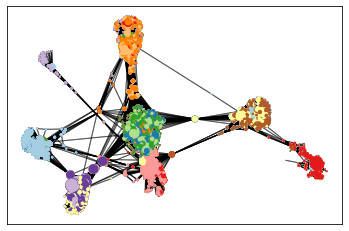

In [34]:
for i in fb.nodes():
  fb.nodes[str(i)]['egocolor'] = 0

idColor = 1
for id in ego_ids:
  G = nx.read_edgelist(
      os.path.join('/content/drive/My Drive/Machine Learning/facebook', 
                   '{0}.edges'.format(id)),
                   nodetype = int)
  for n in G.nodes():
    fb.nodes[str(n)]['egocolor'] = idColor
    idColor += 1
  
  colors = [x['egocolor'] for x in fb.nodes.values() ]
  nsize = np.array([v for v in degree_cent_fb.values() ])
  nsize = 500*(nsize - min(nsize))/(max(nsize) - min(nsize))
  nodes = nx.draw_networkx_nodes(
      fb, pos = pos_fb,
      cmap = plt.get_cmap('Paired'),
      node_color = colors,
      node_size = nsize
  )
  edges = nx.draw_networkx_edges(fb, pos=pos_fb, alpha=.1)

# Community Detection
A community in a network is the set of nodes of the network that is densely connected internally.

I will use Community toolbox for implementing Louvain Method for community detection. 

Number of communities found:  15


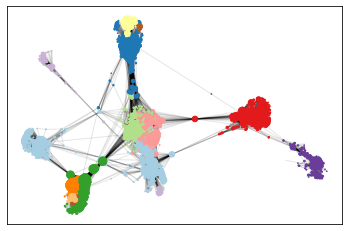

In [36]:
import community
partition = community.best_partition(fb)
print('Number of communities found: ', max(partition.values()))
colors2 = [partition.get(node) for node in fb.nodes()]
nsize = np.array([v for v in degree_cent_fb.values() ])
nsize = 500*(nsize - min(nsize))/ (max(nsize) - min(nsize))
nodes = nx.draw_networkx_nodes(fb,
                               pos = pos_fb,
                               cmap = plt.get_cmap('Paired'),
                               node_color = colors2,
                               node_size = nsize)
edges = nx.draw_networkx_edges(fb, pos=pos_fb, alpha=0.1)

# Conclusion
In this notebook I used Python toolbox, NetworkX which a useful tool for network anlysis. I'm intoduced to some of the basic concepts in social network analysis susch as, Centrality Measures which identifies the importance of a node in the network or community or ego-network, allows to study the reach of the information a node can transmit or have access to. 

I tried to resolve several issues, such as finding the most representative members of the network in terms of the most "connected", the most "circulated" and the "closest" or the most "accessible" nodes to the others. 